In [4]:
%matplotlib inline

# LAB 8 - Carrying Capacity and Sensitivity Analysis

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/github.com/Diego-Ibarra/aquaculture-modelling/blob/master/Week8/Lab%208%20-%20Carrying%20Capacity%20and%20Sensitivity%20Analysis.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab8</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab8</span>:
   * <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing.py</span>
   * <span class='file'>forcing.py</span>
   * <span class='file'>plot_experiment.py</span>
   * <span class='file'>Nitrate.csv</span>
   * <span class='file'>PhyZooSDetLDet.csv</span>
   * <span class='file'>TempSaltOxy.csv</span>
   
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab8</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


In this lab we will be using last week's model to:

* Estimate the **Production Carrying Capacity** and **Environmental Carrying Capacity** for different aquaculture scenarios.
* Conduct a **Sensitivity analysis** for our model.

------

# From last week

First, lets do a quick model run of last week's <span class="file">model_NPZD2_SHELLE_openBoundary_withForcing</span> to make sure all works. In this case, we'll setup the physical dimensions of the model so that the model resembles a 1 m$^3$ tank with no water exchange. The model setup resembles the diagram below (with the pump turned off). 

<img src="Slide1.png" width="800px">

Just as a quick try... <span class="c2c"></span>

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!


C:\Users\Diego\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


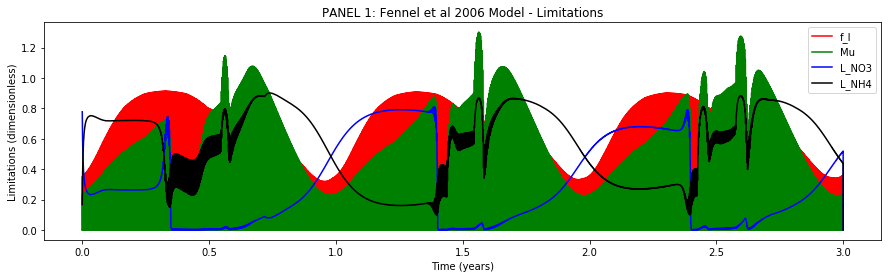

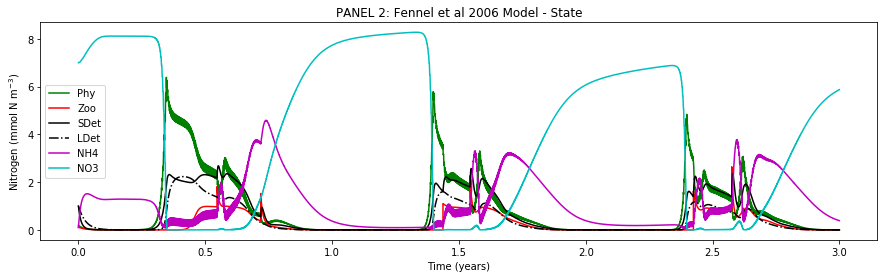

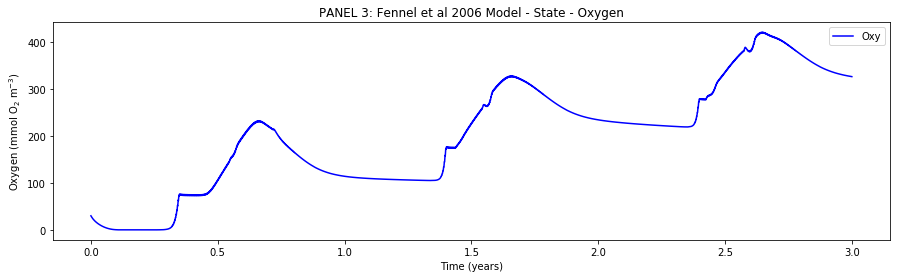

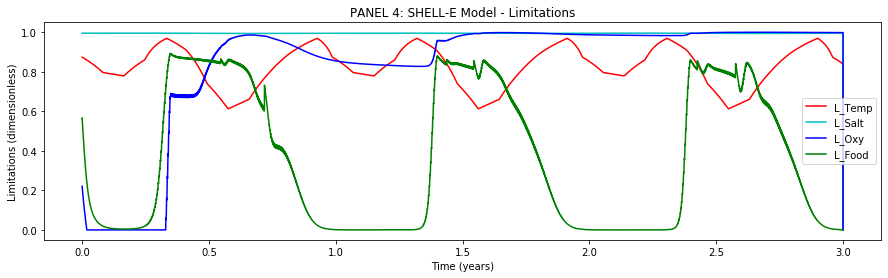

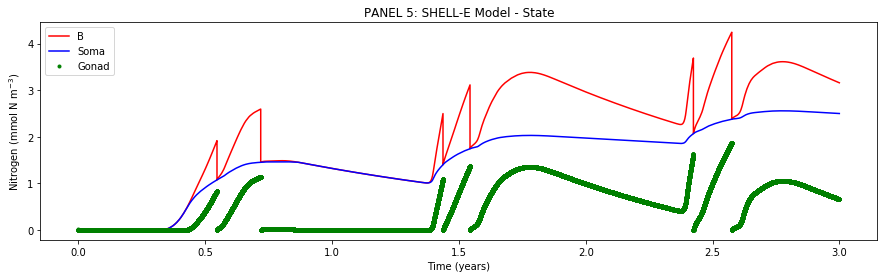

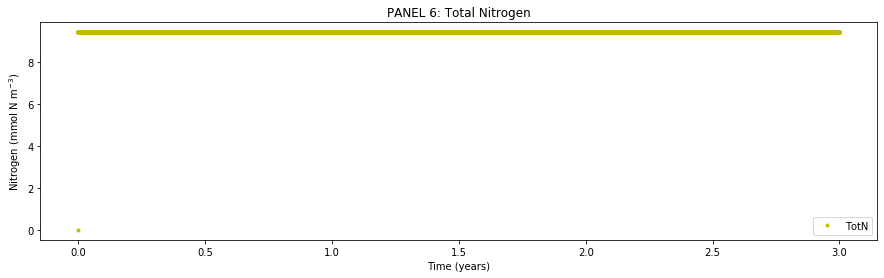

In [6]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
par['chi']  = 0.0 # No exchange of water in tank
par['X'] = 1. # Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1. # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['n_muss'] = 1.
# ----------------------------------------

# Run model ------------------------------
test = model.run(days,dt,InitCond,par,forc) # Run model
model.plot(test) # Plot model

If all plots look ok, lets continue...

-------------------------

# Experiment 1: Tank with no flow

## Production Carrying Capacity

Computing the **Production Carrying Capacity** of the 1 m$^3$ model (described above) involves running several model runs (each with a different amount of mussels), to determine how many mussels we should place in our tank to achieve an **optimum production**. 

### Running the model ensemble

First, make a new file named <span class="file">Exp1_Tank_noFlow.py</span> and save it in your working directory.

Copy-paste the code below into <span class="file">Exp1_Tank_noFlow.py</span>. Note that we are shortening the length of the model runs to only 1.5 years. Since the carrying capacity experiments require multiple runs, shorter runs will significantly speed up the lab.

Also note that we need to define the physical dimensions and exchange parameters (i.e. via `par['X']`,`par['Y']`,`par['Z']` and`par['chi']`). Make sure they define a 1 m$^3$ tank with no exchange.

At the end, the output of each model run will be save in a separate dictionary within the `multioutput` dictionary (same as we did in the previous lab). 

After you save <span class="file">Exp1_Tank_noFlow.py</span>, click <span class="run"></span>

In [8]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing
import plot_experiment as pexp
import pickle

experiment_name = 'Exp1_Tank_noFlow'

days, dt, par, InitCond = model.load_defaults()

days = 365 * 1.5
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
par['chi']  = 0.0 # No exchange of water in tank
par['X'] = 1. # Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1. # Basin depth
# ----------------------------------------

Mussel_levels = [0,1,5,10,20,30] # Units: number of mussels in tank (or bay)

multioutput = {}
for level in Mussel_levels:
    InitCond['n_muss'] = float(level)
    multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( multioutput, open( experiment_name + '.p', 'wb' ) )

print('Experiment is DONE!')

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE!


### Plot ecosystem

Lets take a look inside the `multioutput`.

<div class="c2c"></div>

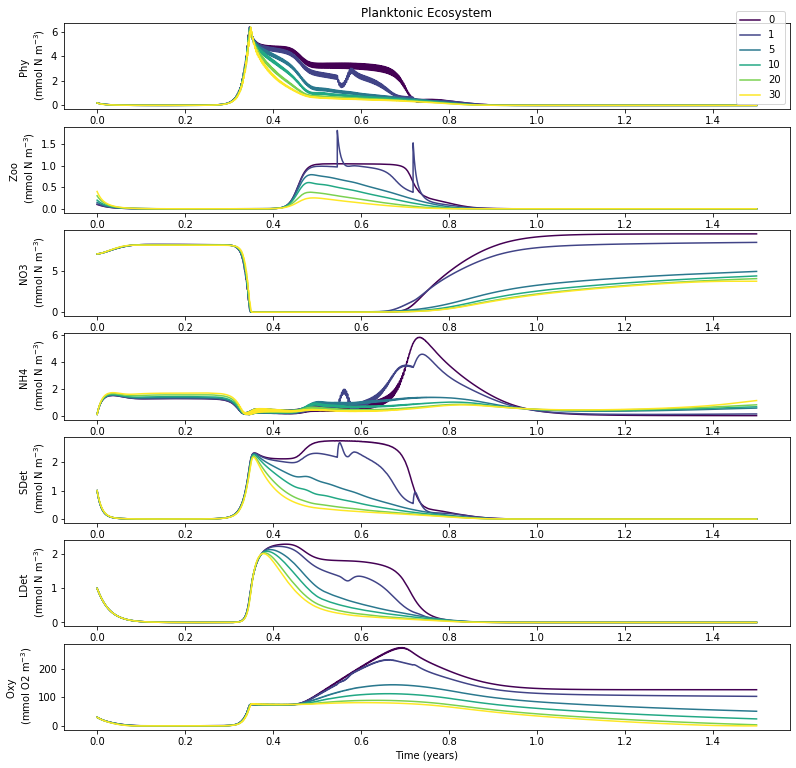

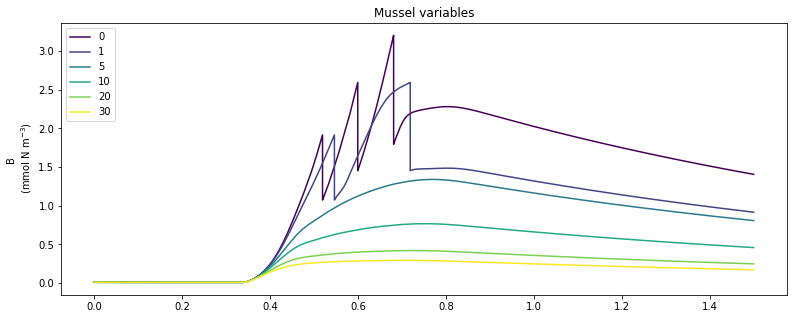

In [9]:
pexp.plot_ecosystem(multioutput)

<div class="Q"><br>

Experiment 1:<br><br>

How many model runs were done in this experiment?


<br><br><div class="qhelp"></div></div>

### Calculate Production Carrying Capacity

Now we'll use the output from each of our model runs to make a plot of "Density vs Production", which we'll then use to estimate the Production Carrying Capacity.

Here we estimate Production as **the maximum Biomass of a mussel in the last year of the simulation, minus the initial Biomass, then multiplied by the number of mussels.**

Note that different "proxies" of Production can be used. All are ok, as long as you explain how did you the calculations.

To make the plot, <span class="c2c"></span>

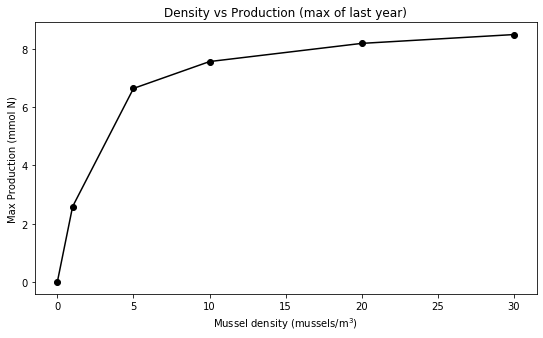

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

SeedDensity, Production = [], []
for level in multioutput:
    SeedDensity.append(float(level))
    # Maximum mussel biomass in the last year of simulation
    maxB = multioutput[level]['B'][-int(365/0.01):]
    # Initial mussel biomass
    initB = multioutput[level]['B'][0]
    # Number of mussels (assuming zero mortality)
    n_muss = multioutput[level]['n_muss'][0]
    # Calculate "Production"
    Production.append((max(maxB)-initB)*n_muss)

df = pd.DataFrame({'SeedDensity' : SeedDensity, 'Production' : Production})
df = df.sort_values(by='SeedDensity')

fig, (ax) = plt.subplots(1,1,figsize=(9,5))
ax.plot(df['SeedDensity'], df['Production'],'ko-')
ax.set_xlabel('Mussel density (mussels/m$^{3}$)')
ax.set_ylabel('Max Production (mmol N)')
ax.set_title('Density vs Production (max of last year)')
plt.show()

I packed the plotting code above in the `densityVSproduction` function within <span class="file">plot_experiment.py</span>. Therefore you can do the same plot with one line of code. Also, I added an extra argument to the function, where you can input the density where you want a "green line" to be drawn.
<br><br>
<div class="important"></div> The green line is NOT calculated automatically. You need to print the graph once, then take a look at the graph, interpret and decide where do you want the green line, then you re-run the function to with the appropriate `optimum=` argument to print a second time the graph (this time with the green line in the correct place).
<br><br>

<div class="c2c"></div>


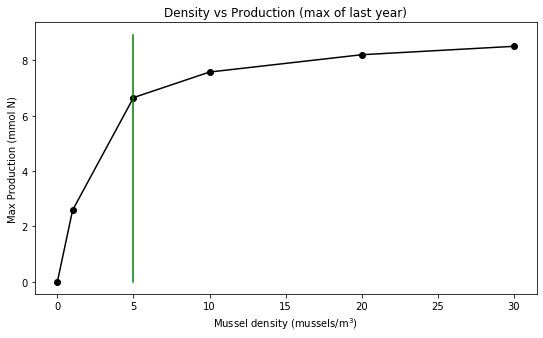

In [11]:
pexp.densityVSproduction(multioutput, optimum=5)

Here you can see that Production quickly increases with Density until about 5 mussels per m$^3$. Afterwards, "large" increases in Density only result in "small" increases in Production. Therefore, the Production Carrying Capacity is **about** 5 mussels per m$^3$.


### Adjustments

Sometimes your original "first guess" on the different Number of Mussels for each run (e.g. `Mussel_levels = [0,1,5,10,20,30]`), may have not been adequate. Perhaps you needed to go a bit further (e.g. to 60 mussels), or perhaps you want to add more levels around your "first guess" carrying capacity in order to estimate it with a finer resolution (e.g. add Mussel_levels 3, 4, 6, 7 and 8). You can add more model runs to your original `Tank1_multioutput` dictionary by:

1. Comment out the line `Tank1_multioutput = {}` so that you don't delete previous results
2. Change `Mussel_levels` to the new densities (e.g. `Mussel_levels = [3,4,6,7,8,15,50]`)
3. run code again

<div class="c2c"></div>

Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE!


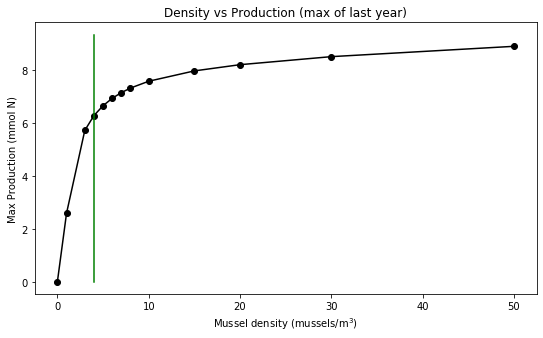

In [13]:
import pickle
import plot_experiment as pexp

experiment_name = 'Exp1_Tank_noFlow'

# Mussel_levels = [0,1,5,10,20,30] # This line is "commented out" during the "adjustment phase"
Mussel_levels = [3,4,6,7,8,15,50]

#multioutput = {}  # NOTE that this line is "commented out" during the "adjustment phase"
for level in Mussel_levels:
    InitCond['n_muss'] = float(level)
    multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( multioutput, open( experiment_name + '.p', 'wb' ) )

print('Experiment is DONE!')

pexp.densityVSproduction(multioutput, optimum=4)

As you can see, with the improved plot, you can see that the Production Carrying Capacity is more like **4 mussels per m$^3$**.

-------------

## Ecological Carrying Capacity

The **Ecological Carrying Capacity** is defined as the maximum level of production attainable without causing "unacceptable" ecological impacts. 

We do not have to run the model multiple times again (since we did this earlier). However, we do have to plot the model results against "water quality" thresholds that define what we understand as "unacceptable" ecological impacts. 

### Effect of mussel density on Oxygen concentration

<div class="c2c"></div>

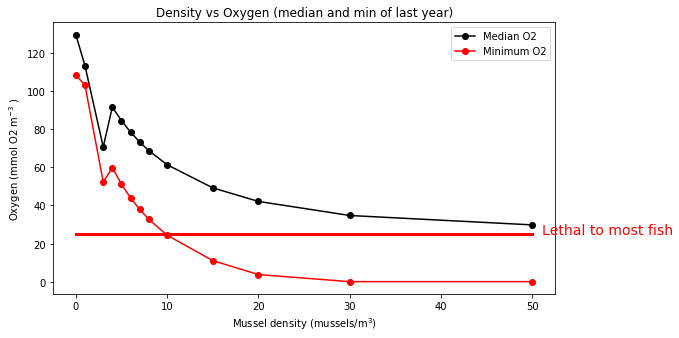

In [14]:
import numpy as np

SeedDensity, MedianOxy, MinOxy, LethalOxy = [], [], [], []
for level in multioutput:
    SeedDensity.append(float(level))
    MedianOxy.append(np.median(multioutput[level]['Oxy'][-int(365/0.01):]))
    MinOxy.append(min(multioutput[level]['Oxy'][-int(365/0.01):]))
    LethalOxy = 25.

df = pd.DataFrame({'SeedDensity' : SeedDensity,
                   'MedianOxy' : MedianOxy,
                   'MinOxy':MinOxy,
                   'LethalOxy':LethalOxy})
df = df.sort_values(by='SeedDensity')

fig, (ax) = plt.subplots(1,1,figsize=(9,5))
ax.plot(df['SeedDensity'], df['MedianOxy'],'ko-')
ax.plot(df['SeedDensity'], df['MinOxy'],'ro-')
ax.plot(df['SeedDensity'], df['LethalOxy'],'r-',linewidth=3)
ax.text(df['SeedDensity'].tail(1)+1, df['LethalOxy'][0], 'Lethal to most fish',color='r',fontsize=14)
ax.set_xlabel('Mussel density (mussels/m$^{3}$)')
ax.set_ylabel('Oxygen (mmol O2 m$^{-3}$ )')
ax.set_title('Density vs Oxygen (median and min of last year)')
ax.legend(['Median O2','Minimum O2'])
plt.show()

or you can do the same plot simply by:

<div class="c2c"></div>

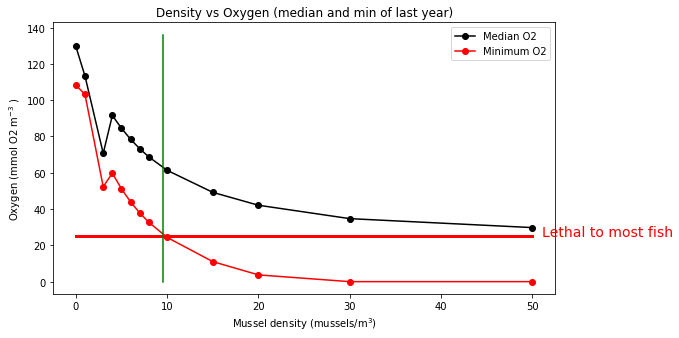

In [15]:
pexp.densityVSoxygen(multioutput, optimum=9.5)

As you can see, you want to set your mussel density **lower** than 10 mussels per m$^3$, otherwise you can start causing negative effects due to low oxygen. With Oxygen, you do not want to be **BELOW** the set threshold.

When you finish exploring the effect of density on oxygen, do the same with ammonia:

<div class="c2c"></div>

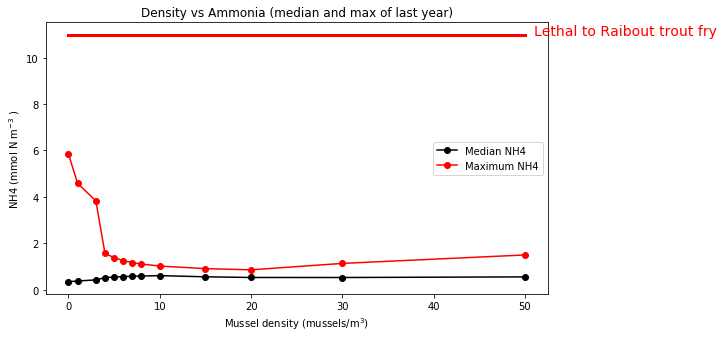

In [16]:
import numpy as np
# NH4
SeedDensity, MedianNH4, MaxNH4, LethalNH4= [], [], [], []
for level in multioutput:
    SeedDensity.append(float(level))
    MedianNH4.append(np.median(multioutput[level]['NH4'][-int(365/0.01):]))
    MaxNH4.append(max(multioutput[level]['NH4'][-int(365/0.01):]))
    LethalNH4 = 11. # For Fry Rainbox trout

df = pd.DataFrame({'SeedDensity' : SeedDensity,
                   'MedianNH4' : MedianNH4,
                   'MaxNH4':MaxNH4,
                   'LethalNH4':LethalNH4})
df = df.sort_values(by='SeedDensity')

fig, (ax) = plt.subplots(1,1,figsize=(9,5))
ax.plot(df['SeedDensity'], df['MedianNH4'],'ko-')
ax.plot(df['SeedDensity'], df['MaxNH4'],'ro-')
ax.plot(df['SeedDensity'], df['LethalNH4'],'r-',linewidth=3)
ax.text(df['SeedDensity'].tail(1)+1, df['LethalNH4'][0], 'Lethal to Raibout trout fry',color='r',fontsize=14)
ax.set_xlabel('Mussel density (mussels/m$^{3}$)')
ax.set_ylabel('NH4 (mmol N m$^{-3}$ )')
ax.legend(['Median NH4','Maximum NH4'])
ax.set_title('Density vs Ammonia (median and max of last year)')
plt.show()


...or in one line of code:

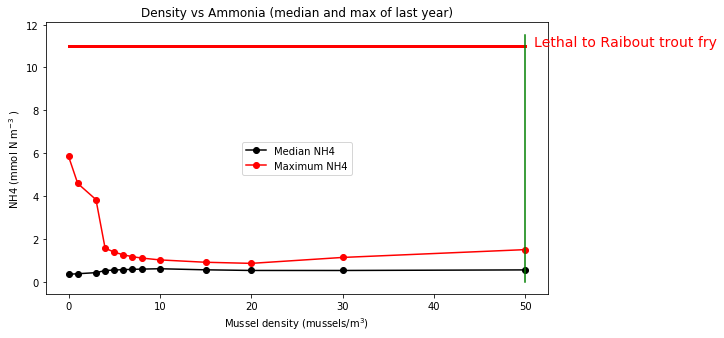

In [17]:
pexp.densityVSammonia(multioutput, optimum=50)

As you can see, ammonia is not a big concern in this scenario. Even at 30 mussels m$^3$ ammonia is not high enough to produce ecological impacts. Note that with ammonia you do not want to be **ABOVE** the set threshold.

### Putting it all together

Now that you determined:

* Production carrying Capacity: 4 mussels m$^3$
* Carrying capacity to avoid problems with Oxygen: less than 10 mussels m$^3$
* Ammonia is not an issue.

The overall estimate for carrying capacity of this system should be: **4 mussels m$^3$**

------------------------

Below is a <span class="checkpoint">CHECKPOINT</span> with the code to run the multiexperiment and do the plots:

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE!


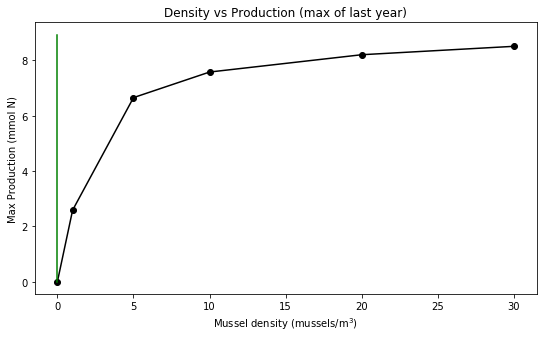

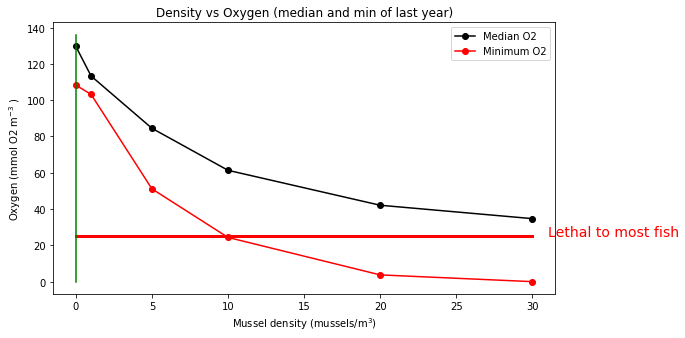

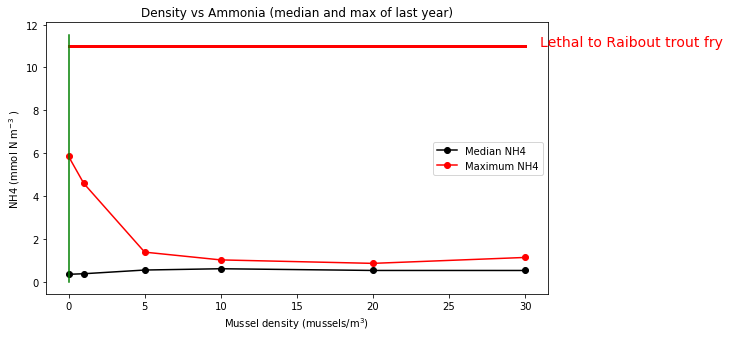

In [19]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing
import plot_experiment as pexp
import pickle

experiment_name = 'Exp1_Tank_noFlow'

days, dt, par, InitCond = model.load_defaults()

days = 365 * 1.5
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
par['chi']  = 0.0 # No exchange of water in tank
par['X'] = 1. # Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1. # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z'] # <<<<<<<<<<<THIS IS NEW
# ----------------------------------------

Mussel_levels = [0,1,5,10,20,30] # Units: number of mussels in tank (or bay)

multioutput = {}
for level in Mussel_levels:
    InitCond['n_muss'] = float(level)
    multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( multioutput, open( experiment_name + '.p', 'wb' ) )

print('Experiment is DONE!')

#%% Plotting ------------------------------------------
pexp.densityVSproduction(multioutput,optimum=0.)
pexp.densityVSoxygen(multioutput,optimum=0.)
pexp.densityVSammonia(multioutput,optimum=0.)

-------------------------

# Experiment 2: Tank with tiny flow

Lets see if you can compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on a new case study (all on your own!).

Experiment 2 is similar to experiment 1, but the tank is slightly larger and the is the pump is dripping a tiny bit of water into the tank.

The physical dimensions of the new tank (i.e. Tank for Exp 2) are:

* Length: 1.1 m
* Width: 1.1 m
* Depth: 1.1 m

Also, the pump is inputing ocean water at the following rate:

* Exchange rate: 0.0001 (units: tank volume per day)


Make a new file named <span class="file">Exp2_Tank_tinyFlow.py</span> and save it in your working directory.

In <span class="file">Exp2_Tank_tinyFlow.py</span>, write code to run several runs of the model `model_NPZD2_SHELLE_openBoundary_withForcing` to estimate the Production Carrying Capacity of the new tank under the new conditions. Use the code from Experiment 1 as a guide.


You should have got 3 figures similar to the following:
    
<img src="Exp2_Tank_tinyFlow_densVsprod.png" width="600px">  
<img src="Exp2_Tank_tinyFlow_densVsoxy.png" width="600px"> 
<img src="Exp2_Tank_tinyFlow_densVsammonia.png" width="600px"> 

<div class="Q"><br>

Experiment 2:<br><br>

Copy-paste your 3 graphs: (1) Density vs Production, (2) Density vs Oxygen and (3) Density vs Ammonia.<br><br>

- Make sure your graphs have enough points (and appropriate range) to estimate the different carrying capacities<br>
- Make sure your graphs have x and y labels with correct units


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

What is the approximate <b>Production Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Based on the effect of mussel density on <b>Oxygen concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Based on the effect of mussel density on <b>Ammonia concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Taking in consideration both oxygen and ammonia, what is the approximate <b>Ecological Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Putting all together... what would you recommended as the <b>Mussel Density</b> to use in this scenario, after taking in consideration the effect of mussel density on all variables (i.e. production, oxygen and ammonia)?

<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Compared to experiment 1, what was the effect of pumping some ocean water into the tank?

<br><br><div class="qhelp"></div></div>

---------------------

# Experiment 3: Embayment with very low exchange

Here we'll change the physical dimensions of our model to represent an embayment similar to the image below:

<img src="Slide2.png" width="800px">


Compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on this case study.

The physical dimensions of the embayment are:

* Length: 2000 m
* Width: 100 m
* Depth: 10 m

Also, the exchange rate with the open ocean is as follows...

* Exchange rate: 0.0001 (units: tank volume per day)


Make a new file named <span class="file">Exp3_Embayment_tinyFlow.py</span> and save it in your working directory.


<div class="Q"><br>

Experiment 3:<br><br>

Copy-paste your 3 graphs: (1) Density vs Production, (2) Density vs Oxygen and (3) Density vs Ammonia.<br><br>

- Make sure your graphs have enough points (and appropriate range) to estimate the different carrying capacities<br>
- Make sure your graphs have x and y labels with correct units


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

What is the approximate <b>Production Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

Based on the effect of mussel density on <b>Oxygen concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

Based on the effect of mussel density on <b>Ammonia concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

Taking in consideration both oxygen and ammonia, what is the approximate <b>Ecological Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

Putting all together... what would you recommended as the <b>Mussel Density</b> to use in this scenario, after taking in consideration the effect of mussel density on all variables (i.e. production, oxygen and ammonia)?

<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 3:<br><br>

Compared to experiment 2, what was the effect of growing mussels in an embayment instead of a tank?

<br><br><div class="qhelp"></div></div>

---------------------

# Experiment 4: Embayment with higher exchange

Here we'll keep the same physical dimensions as the previous embayment model, but we'll increase the exchange rate by a factor of 10. 

Compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on this case study.

The physical dimensions of the embayment are:

* Length: 2000 m
* Width: 100 m
* Depth: 10 m

Also, the exchange rate with the open ocean is as follows...

* Exchange rate: 0.001 (units: tank volume per day)


Make a new file named <span class="file">Exp4_Embayment_HigherFlow.py</span> and save it in your working directory.

<div class="Q"><br>

Experiment 4:<br><br>

Copy-paste your 3 graphs: (1) Density vs Production, (2) Density vs Oxygen and (3) Density vs Ammonia.<br><br>

- Make sure your graphs have enough points (and appropriate range) to estimate the different carrying capacities<br>
- Make sure your graphs have x and y labels with correct units


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

What is the approximate <b>Production Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

Based on the effect of mussel density on <b>Oxygen concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

Based on the effect of mussel density on <b>Ammonia concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

Taking in consideration both oxygen and ammonia, what is the approximate <b>Ecological Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

Putting all together... what would you recommended as the <b>Mussel Density</b> to use in this scenario, after taking in consideration the effect of mussel density on all variables (i.e. production, oxygen and ammonia)?

<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 4:<br><br>

Compared to experiment 3, what was the effect of growing mussels in an embayment with a faster exchange rate (i.e. wider mouth)?

<br><br><div class="qhelp"></div></div>

---------------------

# Experiment 5: Embayment with sewage

Here we'll keep the same physical dimensions as the previous embayment model, also we'll keep the exchange rate as before, but we'll add a source of nitrate to the bay (e.g. sewage). 

Compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on this case study.

The physical dimensions of the embayment are:

* Length: 2000 m
* Width: 100 m
* Depth: 10 m

Also, the exchange rate with the open ocean is as follows...

* Exchange rate: 0.000001 (units: tank volume per day)

Also, add nitrogen to the bay as follows:

* `par['sewage'] = 0.000001` (units: tank volume per day)


Make a new file named <span class="file">Exp5_Embayment_sewage.py</span> and save it in your working directory.

<div class="Q"><br>

Experiment 5:<br><br>

Copy-paste your 3 graphs: (1) Density vs Production, (2) Density vs Oxygen and (3) Density vs Ammonia.<br><br>

- Make sure your graphs have enough points (and appropriate range) to estimate the different carrying capacities<br>
- Make sure your graphs have x and y labels with correct units


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

What is the approximate <b>Production Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

Based on the effect of mussel density on <b>Oxygen concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

Based on the effect of mussel density on <b>Ammonia concentration</b>, what is the maximum mussel density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

Taking in consideration both oxygen and ammonia, what is the approximate <b>Ecological Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

Putting all together... what would you recommended as the <b>Mussel Density</b> to use in this scenario, after taking in consideration the effect of mussel density on all variables (i.e. production, oxygen and ammonia)?

<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 5:<br><br>

Compared to experiment 4, what was the effect of having a source of nutrients (e.g. sewage) in the embayment, on the carrying capacity of mussels in the embayment?

<br><br><div class="qhelp"></div></div>

----------------------

---------------------

# Experiment 6: Sensitivity Analysis

Following material taught in the lecture... below is the code that does the model runs (each with one parameter increased by 1%) to compute the **Sensitivity Analysis** 

In [21]:
import model_NPZD2_SHELLE_openBoundary_withForcing as model
import forcing

days, dt, par, InitCond = model.load_defaults()

days = 365 * 1
forc = forcing.get(dt,days) # Load forcing

par['chi']  = 0.0001 # exchange coefficient (with the "open ocean")
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
par['n_muss'] = 5000000

default = model.run(days,dt,InitCond,par,forc)

Sensitivity = {}
for parameter in par:
    print(parameter)

    days, dt, par, InitCond = model.load_defaults()
    
    days = 365 * 1
    par['chi']  = 0.0001 # exchange coefficient (with the "open ocean")
    par['X'] = 2000.# Basin length
    par['Y'] = 100. # Basin width
    par['Z'] = 10.  # Basin depth
    par['V'] = par['X'] * par['Y'] * par['Z']
    par['n_muss'] = 5000000
    par[parameter] = par[parameter] * 1.01
    treatment = model.run(days,dt,InitCond,par,forc)
    print(default['Soma'][-2])
    print(treatment['Soma'][-2])
    Sensitivity[parameter] = (default['Soma'][-2] - treatment['Soma'][-2])/default['Soma'][-2]

print('Experiment is DONE! and saved in: model_output.p')

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
chi
Model run: DONE!!!
1.9593824001324647
1.9595805192565157
X
Model run: DONE!!!
1.9593824001324647
1.9593824001324647
Y
Model run: DONE!!!
1.9593824001324647
1.9593824001324647
Z
Model run: DONE!!!
1.9593824001324647
1.959381605330593
V
Model run: DONE!!!
1.9593824001324647
1.9593824035650407
uwind
Model run: DONE!!!
1.9593824001324647
1.9593832069022787
vwind
Model run: DONE!!!
1.9593824001324647
1.9593832069022787
mu0
Model run: DONE!!!
1.9593824001324647
1.969058052005363
kNO3
Model run: DONE!!!
1.9593824001324647
1.9590025172265786
kNH4
Model run: DONE!!!
1.9593824001324647
1.9562662594717815
alpha
Model run: DONE!!!
1.9593824001324647
1.969602886305644
gmax
Model run: DONE!!!
1.9593824001324647
1.924891464221842
kP
Model run: DONE!!!
1.9593824001324647
1.961531821755716
mP
Model run: DONE!!!
1.9593824001324647
1.943305083055346
tau
Model run: DONE!!!
1.9593824001324647
1.9544014994120542
thetaMax
Model run:

C:\Users\Diego\Documents\9.AquacultureModelling\aquaculture-modelling\Week8\model_NPZD2_SHELLE_openBoundary_withForcing.py:254: RuntimeWarning: invalid value encountered in double_scalars
  Fmax  = par['Fmax_ref']*(B[t]**(2./3.))


Model run: DONE!!!
1.9593824001324647
nan
Fmax_ref
Model run: DONE!!!
1.9593824001324647
1.9771456229220314
GT
Model run: DONE!!!
1.9593824001324647
1.958712320121725
KTempH
Model run: DONE!!!
1.9593824001324647
1.9638957299455904
KTempL
Model run: DONE!!!
1.9593824001324647
1.9595178305387473
KSaltL
Model run: DONE!!!
1.9593824001324647
1.9599124486802024
KOxyL
Model run: DONE!!!
1.9593824001324647
1.9626287167276724
KFood
Model run: DONE!!!
1.9593824001324647
1.9567920969539891
KRE
Model run: DONE!!!
1.9593824001324647
1.9766227028771755
OxyL
Model run: DONE!!!
1.9593824001324647
1.958457683896216
Rm
Model run: DONE!!!
1.9593824001324647
1.9574811392989961
SaltL
Model run: DONE!!!
1.9593824001324647
1.9591081482171973
TempH
Model run: DONE!!!
1.9593824001324647
1.9738296277505782
TempL
Model run: DONE!!!
1.9593824001324647
1.959462024353598
betaSHELLE
Model run: DONE!!!
1.9593824001324647
1.9568710967727374
epsilonP
Model run: DONE!!!
1.9593824001324647
1.9752629523413545
epsilonD
Mo

...and this is the code to plot the results of the **Sensitivity Analysis**.

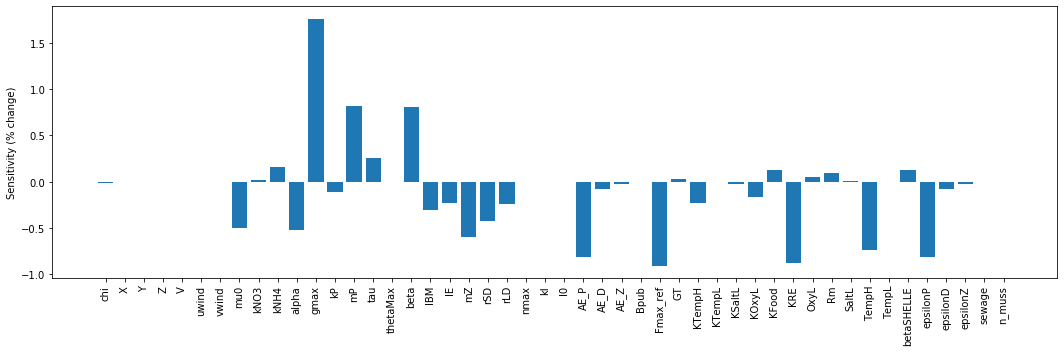

In [33]:
import matplotlib.pyplot as plt
import numpy as np

SensValues = np.array(list(Sensitivity.values()),float)*100

fig, (ax) = plt.subplots(1,1,figsize=(18,5))
ax.bar(range(len(Sensitivity)), SensValues, align='center')
locs, labels = plt.xticks(range(len(Sensitivity)), Sensitivity.keys())
plt.setp(labels, rotation=90)
ax.set_ylabel('Sensitivity (% change)')
plt.show()

<div class="Q"><br>

What was the parameter with the highest sensitivity?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Do you think any of the model parameters has an unreasonably high sensitivity?

<br><br><div class="qhelp"></div></div>

-------------------------

# Experiment 7: Again, tank with tiny flow


Experiment 7 is similar to experiment 1, but the question is completely different question. 

**How "high" needs to be the exchange rate (i.e. `par['chi']`) to be able to have a Production Carrying capacity of 40 mussels m$^{-3}$?**

The physical dimensions of the new tank (i.e. Tank for Exp 2) are:

* Length: 1 m
* Width: 1 m
* Depth: 1 m

Also, the pump is inputing ocean water is unknown (this is the question):

* Exchange rate: ? (units: tank volume per day)


Make a new file named <span class="file">Exp7_HardQuestion.py</span> and save it in your working directory.


<div class="Q"><br>

Experiment 7:
<br><br>

How "high" needs to be the exchange rate (i.e. par['chi']) to be able to have a Production Carrying capacity of 40 mussels m-3 ?

<br><br>
Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [34]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
style = open("../css/custom.css", "r").read()
HTML(style)